# Function to Scrape Latest Tweets and Show Top 10 Words appeared in it

## To run this function you need to set 2 variables:

Tweeter_Scraper_and_Top_10_Words("what you want to search", amount of tweets you would like to scrape)



In [3]:
def Tweeter_Scraper_and_Top_10_Words(input_result, limit_result):
    
    # Import dependencies

    from twitterscraper import query_tweets
    import datetime as dt
    import pandas as pd
    from datetime import date, timedelta
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    from collections import Counter
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    
    today = date.today()
    yesterday = today - timedelta(days = 1)
    tommorow = today + timedelta(days = 1)
    aftertommorow = tommorow + timedelta(days = 1)

    begin_date = today
    end_date = tommorow

    lang = "en"

    tweets = query_tweets(input_result, begindate = begin_date, enddate = end_date, limit = limit_result-20, lang = lang)

    df = pd.DataFrame(tweet.__dict__ for tweet in tweets)
    updated_df = df[["text"]]

    cleaned = updated_df.text.apply(lambda x: tokenizer.tokenize(x.lower()))

    total_words = []

    for sentences in cleaned:
        for word in sentences:
            total_words.append(word)

    
    filtered_words = [word for word in total_words if word not in stopwords.words('english')]
    other_stop_words = ["com", "u", "us", "pic", "twitter", "www", "vs", "http", "status","https", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    final_filtered_words = [word for word in filtered_words if word not in other_stop_words]

    word_counter = Counter(final_filtered_words).most_common(10)    
    normalized_data = list(zip(*word_counter))
    print(normalized_data)
    
      
    plt.figure(figsize = (20, 12))

    tweets = normalized_data[0]
    amount_of_tweets = normalized_data[1]

    plt.bar(tweets, amount_of_tweets, color = "blue", alpha = 0.5, align = "center")

    tick_locations = [value for value in tweets]
    plt.xticks(tick_locations, rotation = 0, size = 20)

    plt.xlim(-0.75, len(tweets) - 0.25)
    plt.ylim(0, max(amount_of_tweets) + 0.1*(max(amount_of_tweets)))

    plt.title(f"Most Common Words in {limit_result} Tweets about '{input_result.title()}'", size = 25).set_position([.5, 1.05])
    plt.xlabel("Words from Tweets", size = 25, labelpad=35)
    plt.ylabel(f"Number of times the word appears in {limit_result} Tweets", size = 25, labelpad=35)

    for a,b in zip(tweets, amount_of_tweets):
        plt.text(a, b + 0.05*(b), str(b), size = 18, ha = "center")

    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YARA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO: queries: ['Barcelona since:2019-09-28 until:2019-09-29']
INFO: Got 1000 tweets (1000 new).


[('barcelona', 'getafe', 'fcbarcelona', 'win', 'suarez', 'away', 'messi', '2019', 'football', 'team'), (762, 211, 78, 77, 67, 65, 60, 59, 59, 56)]


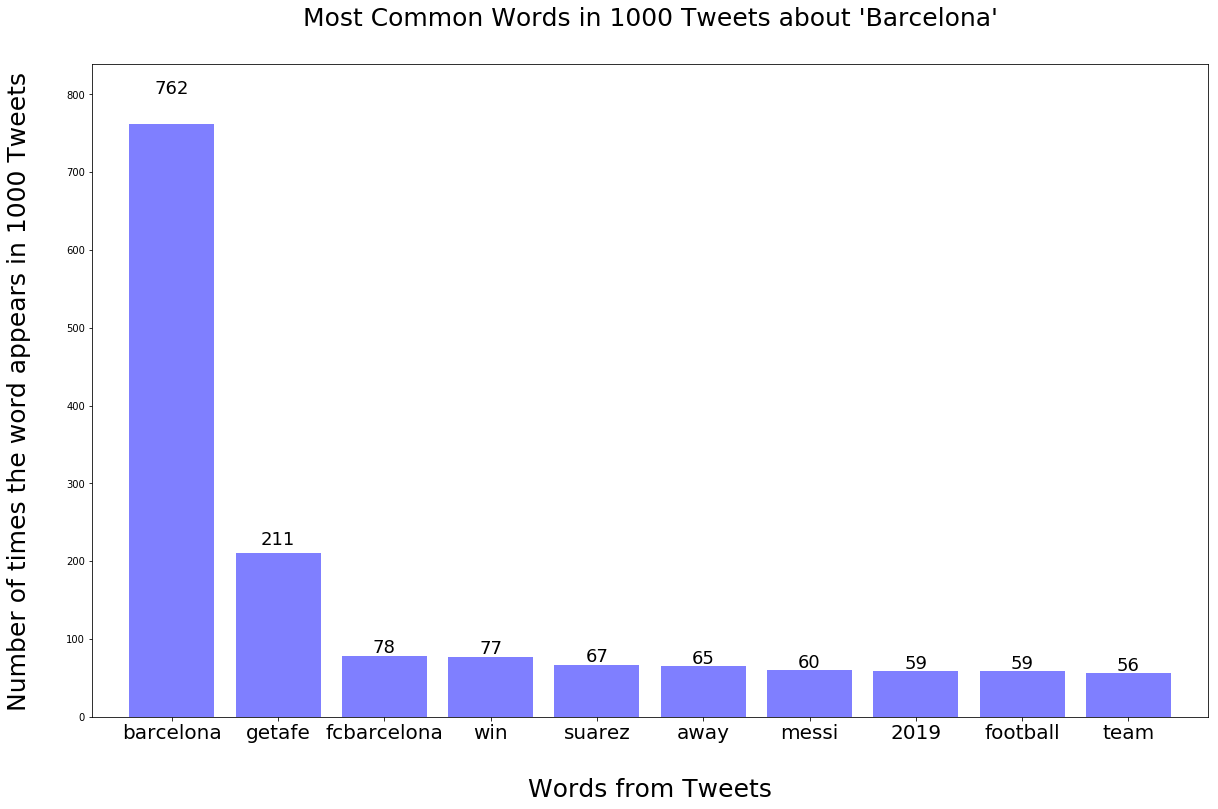

In [4]:
Tweeter_Scraper_and_Top_10_Words("Barcelona", 1000)